<a href="https://colab.research.google.com/github/agibayrashitnu/Deep-Learning/blob/main/CNN_for_digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Installation and Setup


In [3]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.12.0


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [7]:
# Importing the dataset
from tensorflow.keras.datasets import mnist

In [8]:
# Loading the dataset
(x_train,y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


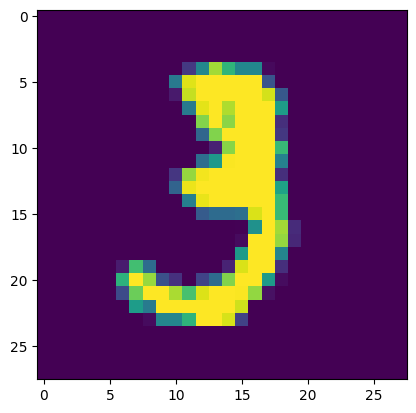

In [9]:
plt.imshow(x_train[10])

In [10]:
y_train[10]

3

In [11]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [12]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [13]:
x_train.min(), x_train.max(), x_train.mean()

(0, 255, 33.318421449829934)

In [14]:
y_train.min(), y_train.max(), y_train.mean()

(0, 9, 4.4539333333333335)

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [17]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
# reshape the images
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [19]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [20]:
input_shape = x_train[0].shape

In [21]:
print(input_shape)

(28, 28, 1)


# Step 3: Building the Model

In [23]:
# define an object
model = tf.keras.models.Sequential()

In [24]:
#Adding first
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3),
                                 activation = 'relu', input_shape = (28,28,1)))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3),
                                 activation = 'relu', input_shape = (28,28,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())

# Fully connected layer
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
#output layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                        

In [32]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

# Step 4: Training the Model


In [33]:
 model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 156s 327ms/step - loss: 0.2021 - sparse_categorical_accuracy: 0.9393 - val_loss: 0.0667 - val_sparse_categorical_accuracy: 0.9781
Epoch 2/10
469/469 [==============================] - 143s 306ms/step - loss: 0.0622 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.0378 - val_sparse_categorical_accuracy: 0.9874
Epoch 3/10
469/469 [==============================] - 146s 312ms/step - loss: 0.0432 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0352 - val_sparse_categorical_accuracy: 0.9886
Epoch 4/10
469/469 [==============================] - 146s 312ms/step - loss: 0.0335 - sparse_categorical_accuracy: 0.9898 - val_loss: 0.0323 - val_sparse_categorical_accuracy: 0.9895
Epoch 5/10
469/469 [==============================] - 149s 317ms/step - loss: 0.0263 - sparse_categorical_accuracy: 0.9913 - val_loss: 0.0345 - val_sparse_categorical_accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 143s 305ms/step - loss: 0.

In [35]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 8s 24ms/step


In [38]:
y_pred[7],y_test[7]

(9, 9)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 974    0    1    1    0    1    2    0    1    0]
 [   0 1131    0    0    0    1    2    0    1    0]
 [   1    1 1020    2    1    0    0    5    2    0]
 [   0    0    0 1003    0    3    0    2    1    1]
 [   0    0    0    0  970    0    1    0    1   10]
 [   1    1    0    3    0  885    1    0    1    0]
 [   4    2    0    0    4    1  946    0    1    0]
 [   0    1    4    2    0    0    0 1015    2    4]
 [   1    0    1    1    0    0    0    3  964    4]
 [   1    1    0    0    2    5    0    4    2  994]]


In [41]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9902
